In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Olympic_Swimming.csv")
df.head()

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Location              4359 non-null   object
 1   Year                  4359 non-null   int64 
 2   Distance (in meters)  4359 non-null   object
 3   Stroke                4359 non-null   object
 4   Relay?                4359 non-null   int64 
 5   Gender                4359 non-null   object
 6   Team                  4359 non-null   object
 7   Athlete               4345 non-null   object
 8   Results               4331 non-null   object
 9   Rank                  4359 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 340.7+ KB


,Year,Relay?,Rank
count,4359.000000,4359.000000,4359.000000
mean,1982.936453,0.169764,3.164946
std,26.928344,0.375468,1.189715
min,1912.000000,0.000000,0.000000
25%,1968.000000,0.000000,2.000000
50%,1988.000000,0.000000,4.000000
75%,2004.000000,0.000000,4.000000
max,2020.000000,1.000000,5.000000


The athlete with the most gold medals is Michael Phelps with 13 gold medals.


C:\Users\Kevin\AppData\Local\Temp\ipykernel_70140\1722919841.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_gold_medals.values, y=top_gold_medals.index, palette='muted')


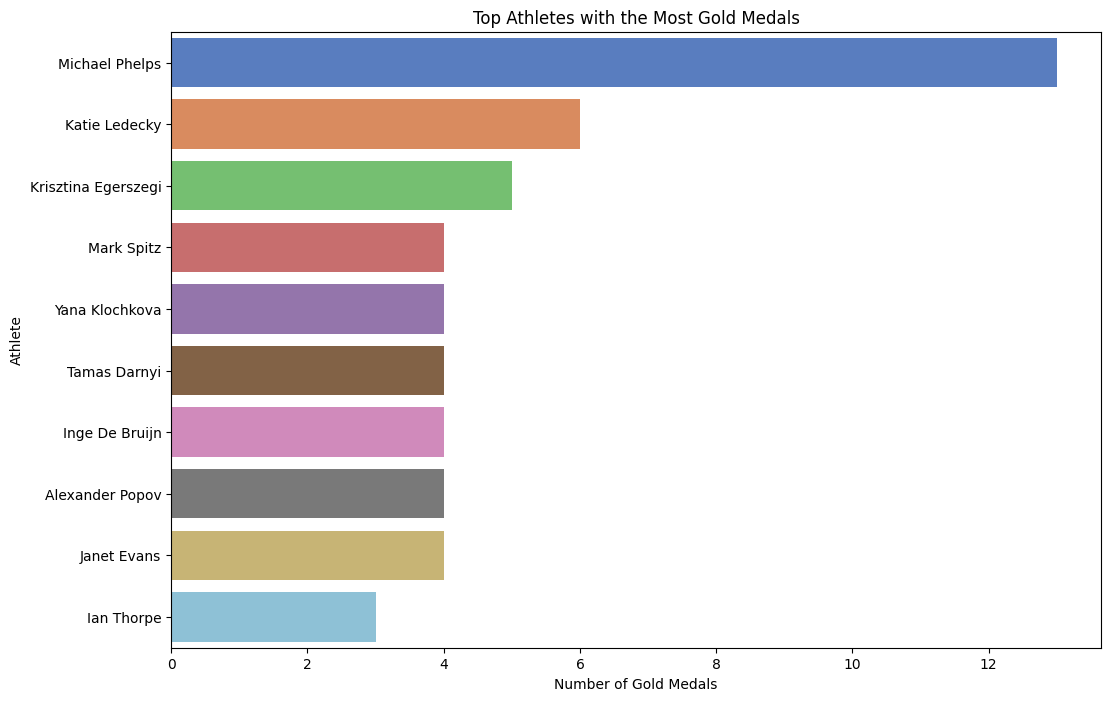

In [90]:
## Question 1: Who has won the most gold medals?

gold_medals = df[df['Rank'] == 1]
gold_medal_counts = gold_medals['Athlete'].value_counts()
most_gold_medals = gold_medal_counts.idxmax()
most_gold_medals_count = gold_medal_counts.max()
print(f'The athlete with the most gold medals is {most_gold_medals} with {most_gold_medals_count} gold medals.')

## Visualization

top_gold_medals = gold_medals['Athlete'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_gold_medals.values, y=top_gold_medals.index, palette='muted')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Athlete')
plt.title('Top Athletes with the Most Gold Medals')
plt.show()

World Record Times for Each Swimming Event:     Distance (in meters)             Stroke Gender  \
3137                 100m         Backstroke    Men   
750                  100m         Backstroke  Women   
1008                 100m       Breaststroke    Men   
248                  100m       Breaststroke  Women   
16                   100m          Butterfly    Men   
1547                 100m          Butterfly  Women   
4093                 100m          Freestyle    Men   
3192                 100m          Freestyle  Women   
544                 1500m          Freestyle    Men   
144                 1500m          Freestyle  Women   
552                  200m         Backstroke    Men   
560                  200m         Backstroke  Women   
568                  200m       Breaststroke    Men   
576                  200m       Breaststroke  Women   
840                  200m          Butterfly    Men   
592                  200m          Butterfly  Women   
856                  2

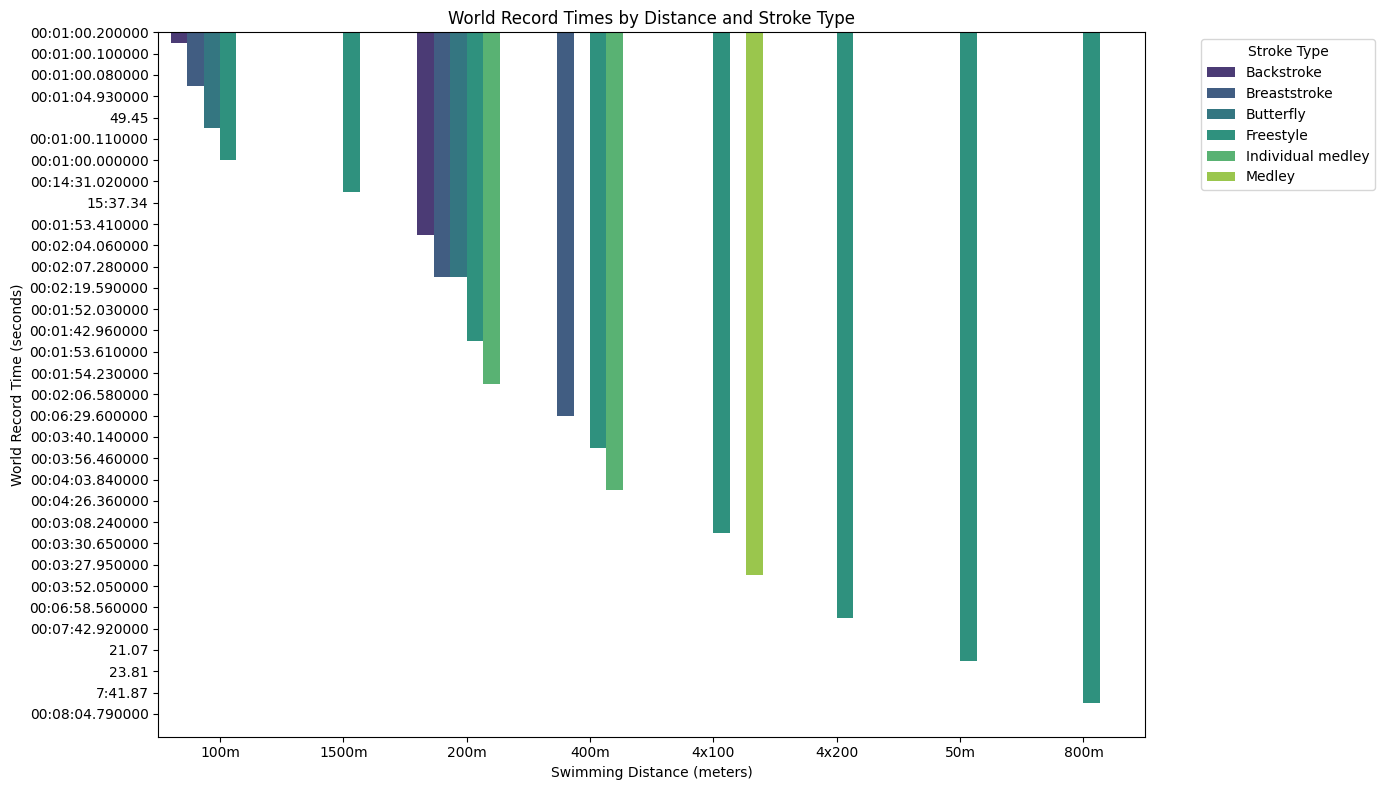

In [81]:
## Question 2: What are the world record times for each swimming event?

filtered_df = df[df['Rank'] != 5]
world_records = filtered_df.loc[filtered_df.groupby(['Distance (in meters)', 'Stroke', 'Gender'])['Results'].idxmin()]
world_records = world_records[['Distance (in meters)', 'Stroke', 'Gender', 'Athlete', 'Results']]
print(f'World Record Times for Each Swimming Event:{world_records}')

## Visualization

plt.figure(figsize=(14, 8))
sns.barplot(
    x='Distance (in meters)',
    y='Results',
    hue='Stroke',
    data=world_records,
    palette='viridis',
    errorbar=None
)
plt.xlabel('Swimming Distance (meters)')
plt.ylabel('World Record Time (seconds)')
plt.title('World Record Times by Distance and Stroke Type')
plt.legend(title='Stroke Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks()
plt.tight_layout()
plt.show()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_24620\349542094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freestyle_times['Results'] = pd.to_numeric(freestyle_times['Results'], errors='coerce')


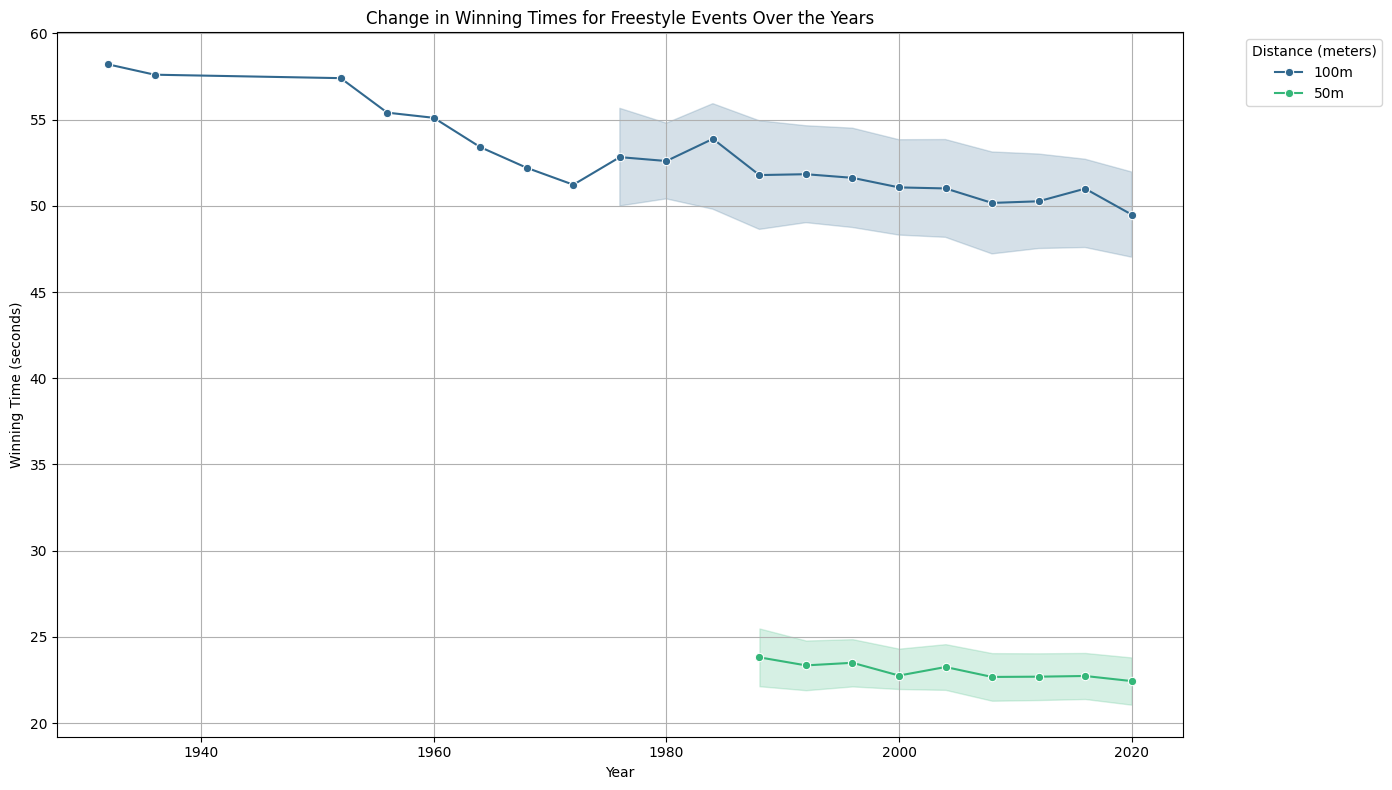

In [53]:
## Question 3: How have the winning times for freestyle events changed over the years?

freestyle_df = df[(df['Stroke'] == 'Freestyle') & (df['Rank'] == 1)]
freestyle_times = freestyle_df[['Year', 'Distance (in meters)', 'Results']]
freestyle_times['Results'] = pd.to_numeric(freestyle_times['Results'], errors='coerce')
freestyle_times = freestyle_times.dropna()

## Visualization

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=freestyle_times,
    x='Year',
    y='Results',
    hue='Distance (in meters)',
    marker='o',
    palette='viridis'
)
plt.xlabel('Year')
plt.ylabel('Winning Time (seconds)')
plt.title('Change in Winning Times for Freestyle Events Over the Years')
plt.legend(title='Distance (meters)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_24620\2068729179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


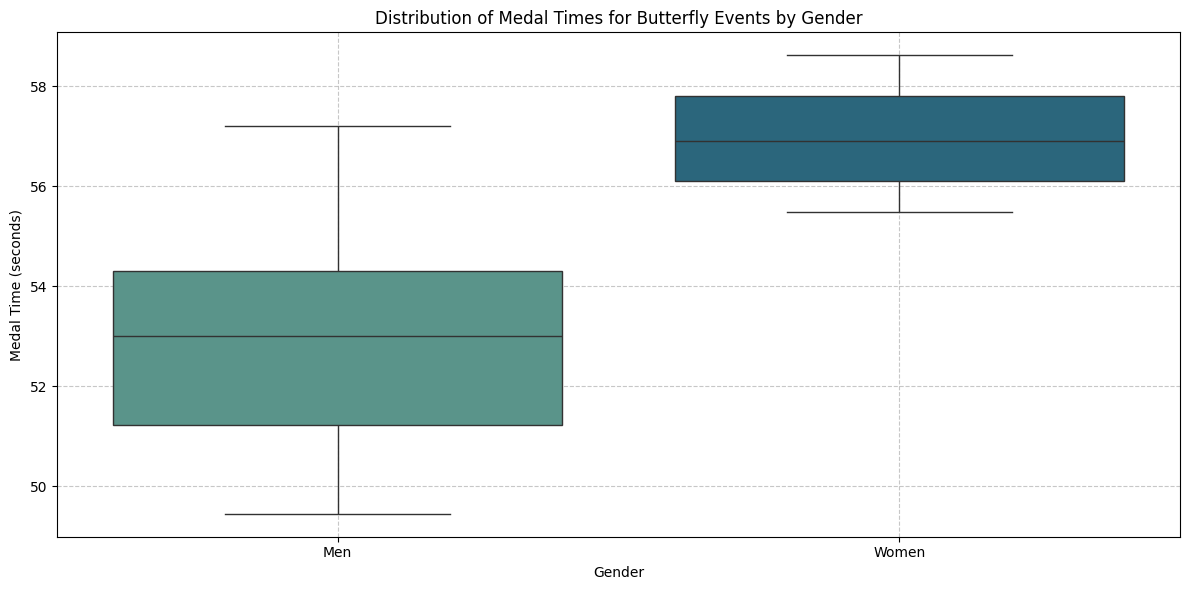

In [108]:
## Question 4: How does the average medal time differ between men and women in butterfly events?

butterfly_df = df[(df['Stroke'] == 'Butterfly') & (df['Rank'] <= 3)]
butterfly_df.loc[:, 'Results'] = pd.to_numeric(butterfly_df['Results'], errors='coerce')
butterfly_df = butterfly_df.dropna(subset=['Results'])

## Visualization

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Gender',
    y='Results',
    data=butterfly_df,
    palette='crest'
)
plt.xlabel('Gender')
plt.ylabel('Medal Time (seconds)')
plt.title('Distribution of Medal Times for Butterfly Events by Gender')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Countries with Most Gold Medals:
  Country  Gold_Medals
0     USA          240
1     AUS           61
2     GDR           30
3     HUN           25
4     JPN           24


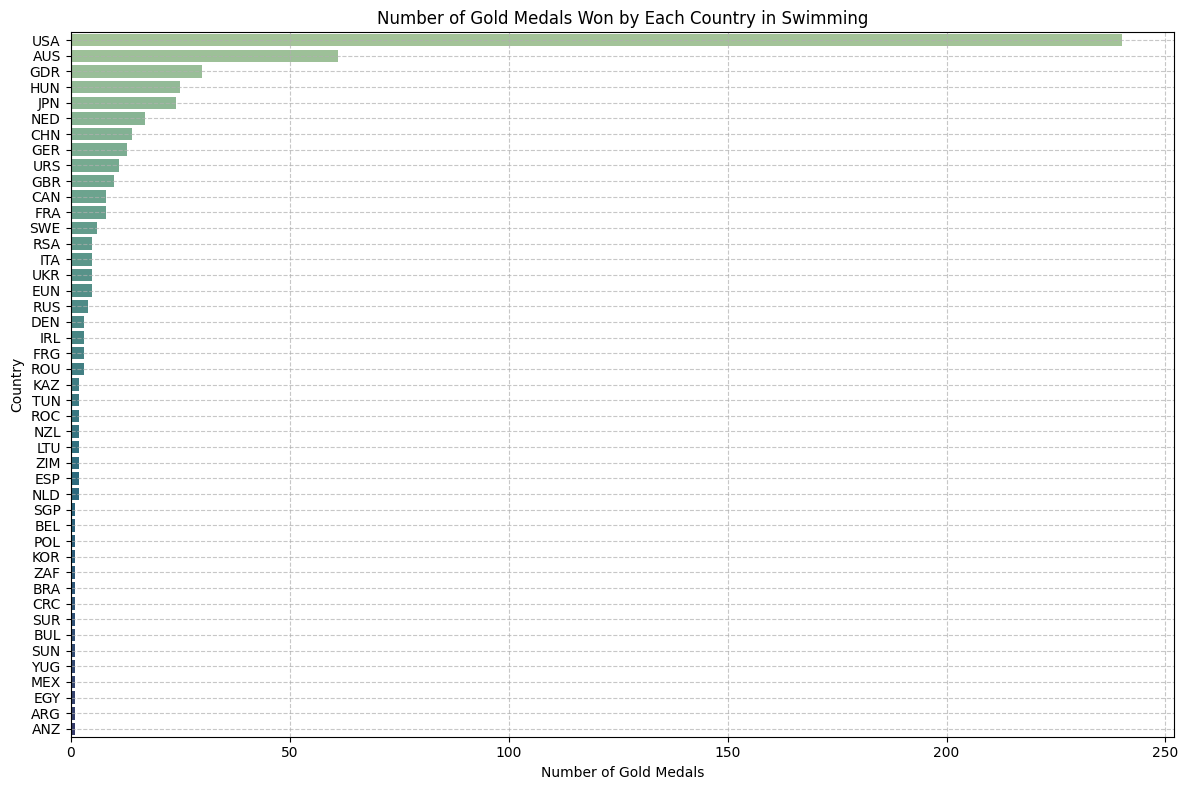

In [51]:
## Question 5: Which country has won the most gold medals in swimming across all years?

gold_medals_df = df[df['Rank'] == 1]
gold_medals_count = gold_medals_df['Team'].value_counts().reset_index()
gold_medals_count.columns = ['Country', 'Gold_Medals']
print("\nCountries with Most Gold Medals:")
print(gold_medals_count.head())

## Visualization

plt.figure(figsize=(12, 8))
sns.barplot(x='Gold_Medals', y='Country', data=gold_medals_count, hue='Country', palette='crest')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Country')
plt.title('Number of Gold Medals Won by Each Country in Swimming')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

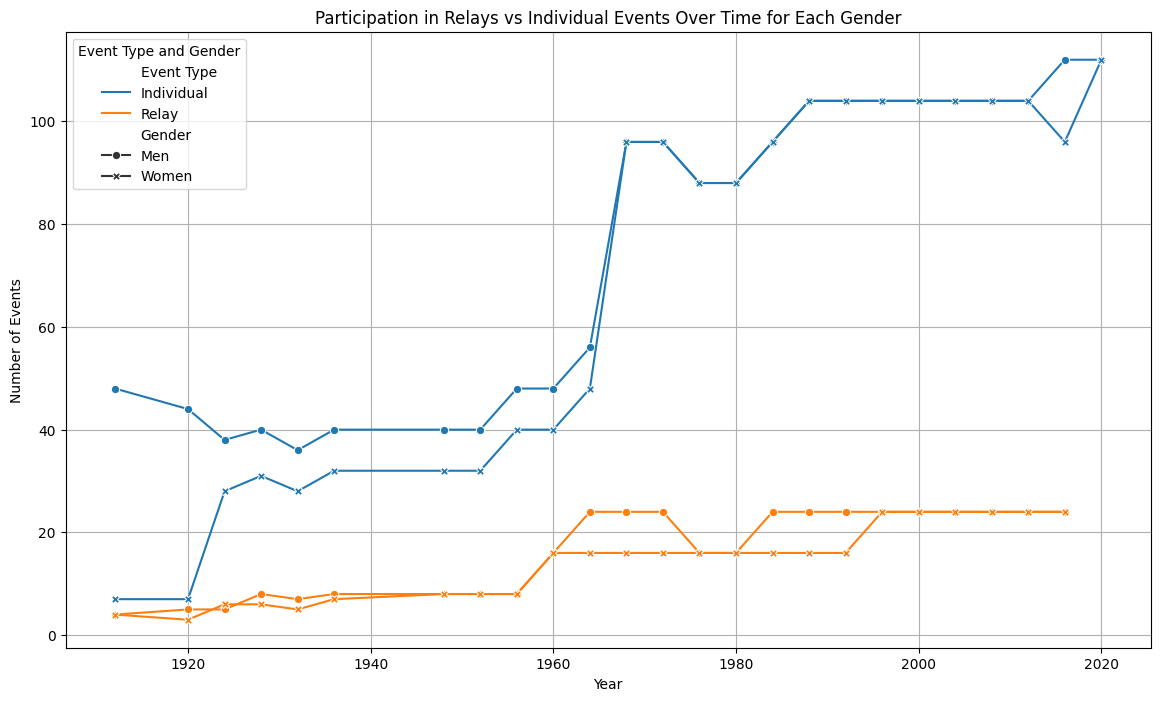

In [52]:
## Question 6: How has participation in relays versus individual events changed over time for each gender?

participation_data = df.groupby(['Year', 'Gender', 'Relay?']).size().reset_index(name='Count')
participation_data['Event Type'] = participation_data['Relay?'].map({0: 'Individual', 1: 'Relay'})

## Visualization

plt.figure(figsize=(14, 8))
sns.lineplot(data=participation_data, x='Year', y='Count', hue='Event Type', style='Gender', markers=True, dashes=False)
plt.title('Participation in Relays vs Individual Events Over Time for Each Gender')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Event Type and Gender')
plt.grid(True)
plt.show()


              Stroke    Results
0         Backstroke     55.435
1       Breaststroke     58.605
2          Butterfly   53.39375
3          Freestyle  36.517187
4  Individual medley        NaN


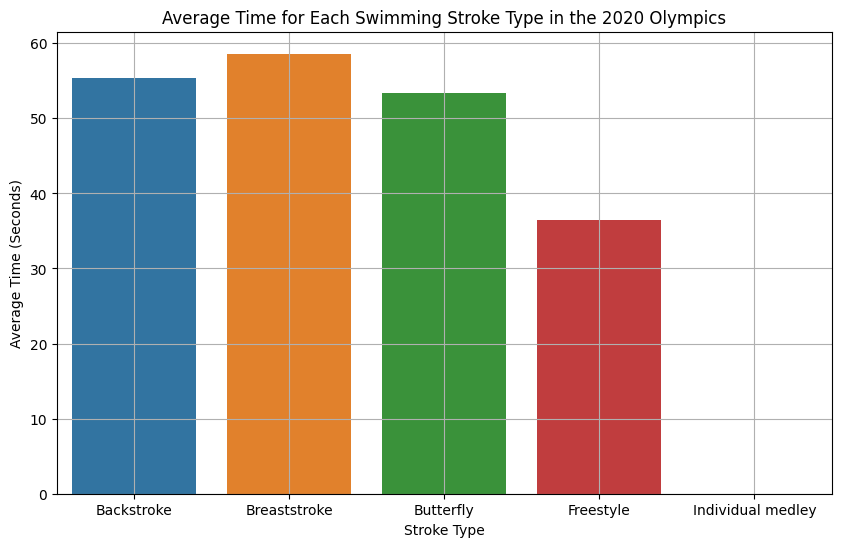

In [80]:
## Question 7: What is the average time for each swimming stroke type in the latest Olympics?

df['Year'] = df['Year'].astype(int)
latest_year = df['Year'].max()
latest_olympics_data = df[df['Year'] == latest_year].copy()
latest_olympics_data.loc[:, 'Results'] = pd.to_numeric(latest_olympics_data['Results'], errors='coerce')
average_times_by_stroke = latest_olympics_data.groupby('Stroke')['Results'].mean().reset_index()
print(average_times_by_stroke)

## Visualization

plt.figure(figsize=(10, 6))
sns.barplot(data=average_times_by_stroke, x='Stroke', y='Results', hue='Stroke')
plt.title(f'Average Time for Each Swimming Stroke Type in the {latest_year} Olympics')
plt.xlabel('Stroke Type')
plt.ylabel('Average Time (Seconds)')
plt.xticks()
plt.grid(True)
plt.show()



    Decade        Stroke    Results
8     1930     Freestyle  57.900000
15    1950     Freestyle  56.400000
18    1960     Butterfly  55.900000
19    1960     Freestyle  53.566667
22    1970    Backstroke  55.490000
24    1970     Butterfly  54.310000
25    1970     Freestyle  50.605000
28    1980    Backstroke  55.790000
30    1980     Butterfly  53.666667
31    1980     Freestyle  40.780000
34    1990    Backstroke  54.040000
36    1990     Butterfly  52.795000
37    1990     Freestyle  22.020000
40    2000    Backstroke  53.440000
42    2000     Butterfly  51.276667
43    2000     Freestyle  21.736667
46    2010    Backstroke  52.065000
47    2010  Breaststroke  57.130000
48    2010     Butterfly  50.800000
49    2010     Freestyle  21.370000
52    2020    Backstroke  51.980000
53    2020  Breaststroke  57.370000
54    2020     Butterfly  49.450000
55    2020     Freestyle  21.070000


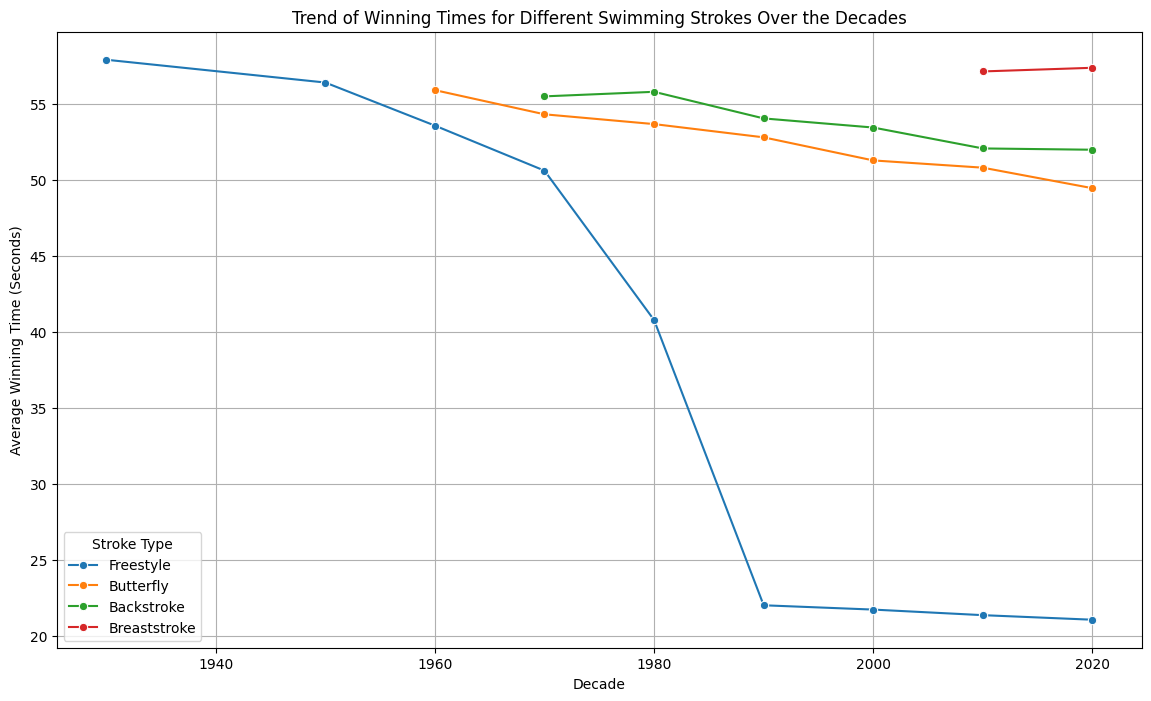

In [78]:
## Question 8: How has participation in relays versus individual events changed over time for each gender?

gold_medals = df[df['Rank'] == 1].copy()
gold_medals['Results'] = pd.to_numeric(gold_medals['Results'], errors='coerce')
winning_times = gold_medals.groupby(['Year', 'Stroke'])['Results'].min().reset_index()
winning_times['Decade'] = (winning_times['Year'] // 10) * 10
average_times_per_decade = winning_times.groupby(['Decade', 'Stroke'])['Results'].mean().reset_index()
pivoted_times = average_times_per_decade.pivot(index='Decade', columns='Stroke', values='Results').reset_index()
average_times_per_decade = average_times_per_decade.dropna(subset=['Results'])
print(average_times_per_decade)

## Visualization
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_times_per_decade, x='Decade', y='Results', hue='Stroke', marker='o', palette='tab10')
plt.title('Trend of Winning Times for Different Swimming Strokes Over the Decades')
plt.xlabel('Decade')
plt.ylabel('Average Winning Time (Seconds)')
plt.grid(True)
plt.legend(title='Stroke Type')
plt.show()



The Olympic year with the highest number of participating countries in swimming events is 2004 with 36 countries.


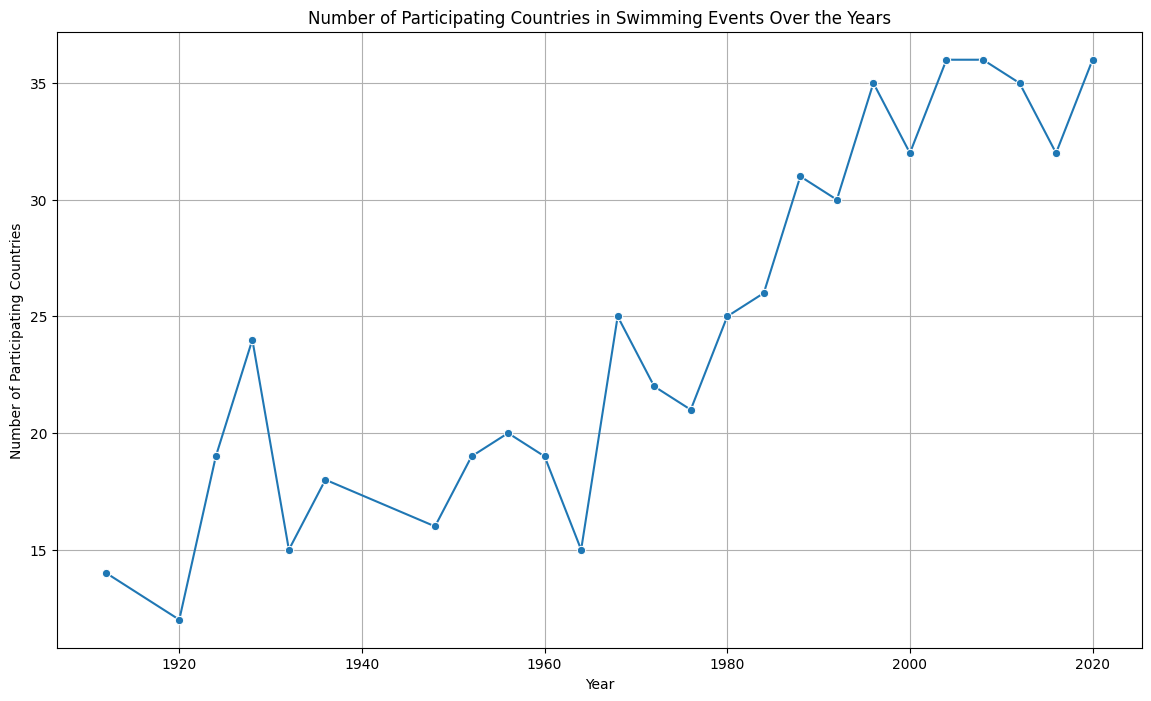

In [13]:
## Question 9: Which Olympic year had the highest number of participating countries in swimming events?

countries_by_year = df.groupby('Year')['Team'].nunique().reset_index(name='Number of Participating Countries')
max_countries_year = countries_by_year.loc[countries_by_year['Number of Participating Countries'].idxmax()]
print(f"The Olympic year with the highest number of participating countries in swimming events is {max_countries_year['Year']} with {max_countries_year['Number of Participating Countries']} countries.")

## Visualization

plt.figure(figsize=(14, 8))
sns.lineplot(data=countries_by_year, x='Year', y='Number of Participating Countries', marker='o')
plt.title('Number of Participating Countries in Swimming Events Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participating Countries')
plt.grid(True)
plt.show()



The country with the fastest average winning time in freestyle events is BRA with an average time of 21.30 seconds.


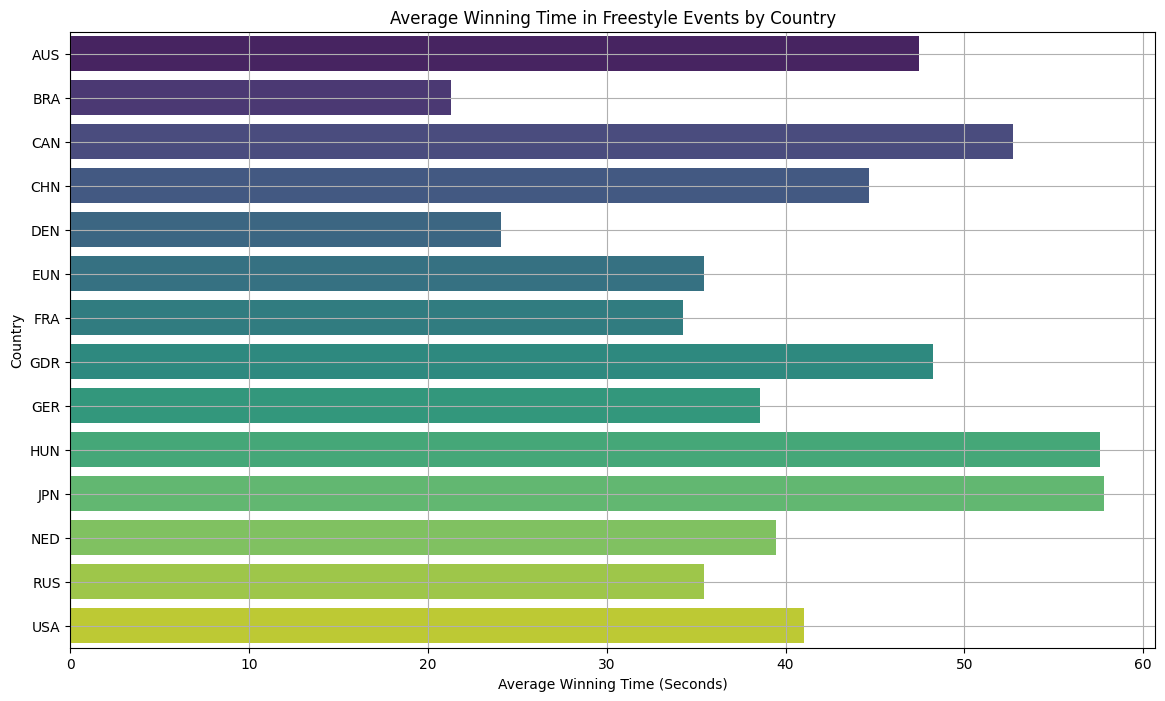

In [79]:
## Question 10: Which country has the fastest average winning time in freestyle events?

freestyle_winners = df[(df['Stroke'] == 'Freestyle') & (df['Rank'] == 1)].copy()
freestyle_winners.loc[:, 'Results'] = pd.to_numeric(freestyle_winners['Results'], errors='coerce')
freestyle_winners = freestyle_winners.dropna(subset=['Results'])
average_times_by_country = freestyle_winners.groupby('Team')['Results'].mean().reset_index()
fastest_country = average_times_by_country.loc[average_times_by_country['Results'].idxmin()]
print(f"The country with the fastest average winning time in freestyle events is {fastest_country['Team']} with an average time of {fastest_country['Results']:.2f} seconds.")

## Visualization
plt.figure(figsize=(14, 8))
sns.barplot(data=average_times_by_country, x='Results', y='Team', hue='Team', palette='viridis')
plt.title('Average Winning Time in Freestyle Events by Country')
plt.xlabel('Average Winning Time (Seconds)')
plt.ylabel('Country')
plt.grid(True)
plt.show()